# Algorithmic Machine Learning assignment
due date: 27.05.2016 <br>
student: Adrian Simon Bauer

## Excercise 1:

In [1]:
import numpy as np
import pandas as pd

# read the datafiles
redWine = pd.read_csv('winequality-red.csv', sep=';', header=0)
whiteWine = pd.read_csv('winequality-white.csv', sep=';', header=0)

## TODO: check for NA-data

In [2]:
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


## Excercise 2: Histogram of the wine quality

In [4]:
histogramRed = redWine.groupby('quality').size()
histogramWhite = whiteWine.groupby('quality').size()

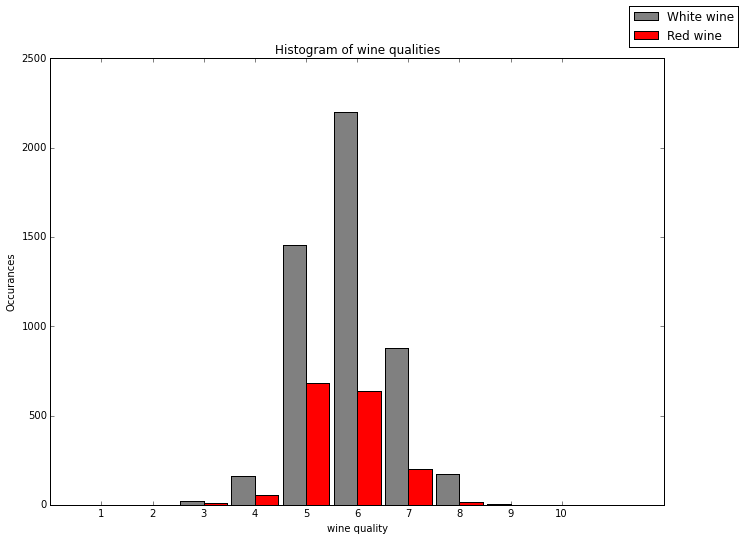

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


figWidth = 11
fig = plt.figure(figsize=(figWidth,8))

redKeys = list(histogramRed.keys())
whiteKeys = list(histogramWhite.keys())

redValues = np.zeros(10)
whiteValues = np.zeros(10)

## the code below can be used for normalization of the values
#sumRedWine = sum(histogramRed)
#sumWhiteWine = sum(histogramWhite)

for key in redKeys:
    redValues[key-1] = histogramRed[key]# / sumRedWine
for key in whiteKeys:
    whiteValues[key-1] = histogramWhite[key]# / sumWhiteWine

ind = np.arange(1, 11)                # the x locations for the groups
width = figWidth / (2*12.0)

white = plt.bar(ind-width, whiteValues, width,
                color='grey')

red = plt.bar(ind, redValues, width,
                    color='red')

# axes and labels
plt.ylabel('Occurances')
plt.xlabel('wine quality')
plt.title('Histogram of wine qualities')
xTickMarks = ind+width
plt.xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
fig.legend( (white[0], red[0]), ('White wine', 'Red wine') )

plt.show()

## Excercise 3
When we look at this figure, we can clearly observe, that we have a higher number of samples for the white wine than for the red wine. So we can assume that we will be able to observe more precise results for the white wines as the 'noise' on our measurements won't influence the analysis as much as it does on the red wine.
<br> From a first glance it seems that both distributions follow a gaussian distribution with a mean value around 5-6.

## Excercise 4 (linear regression)
### 4.1 create training- and test-data 

In [84]:
# define the proportion
trainingSize = 0.7
testSize = 0.3

# create randomly shuffled list of indexes
indexes = np.arange(len(redWine))
np.random.shuffle(indexes)

# split the indexes into training and test indexes
trainingInd = indexes[:int(trainingSize*len(indexes))]
testInd = indexes[int(trainingSize*len(indexes))+1:]

# split the data accordingly to the indexes
trainRed = redWine.ix[trainingInd,:]
testRed = redWine.ix[testInd,:]
trainRed.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1136,10.4,0.52,0.45,2.0,0.080,6,13,0.99774,3.22,0.76,11.4,6
769,7.9,0.72,0.01,1.9,0.076,7,32,0.99668,3.39,0.54,9.6,5
28,7.1,0.71,0.00,1.9,0.080,14,35,0.99720,3.47,0.55,9.4,5
800,7.2,0.61,0.08,4.0,0.082,26,108,0.99641,3.25,0.51,9.4,5
1569,6.2,0.51,0.14,1.9,0.056,15,34,0.99396,3.48,0.57,11.5,6


In [85]:
testRed.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1038,8.7,0.41,0.41,6.2,0.078,25,42,0.99530,3.24,0.77,12.6,7
838,10.1,0.31,0.35,1.6,0.075,9,28,0.99672,3.24,0.83,11.2,7
241,12.0,0.38,0.56,2.1,0.093,6,24,0.99925,3.14,0.71,10.9,6
426,6.4,0.67,0.08,2.1,0.045,19,48,0.99490,3.49,0.49,11.4,6
806,8.4,0.25,0.39,2.0,0.041,4,10,0.99386,3.27,0.71,12.5,7


### 4.2 fit linear regression

In [104]:
def featurizeData(data, order=1):
        # add the '1' column to the data
        data['1'] = 1
        return data.as_matrix()

def linearRegression(data, targets, order=1):
    features = featurizeData(data, 1)
    targetVec = targets.as_matrix()
    
    weights = np.dot(np.linalg.inv(np.dot(np.transpose(features), features)),np.dot(np.transpose(features),targetVec))
    return weights

In [99]:
w = linearRegression(testRed.loc[:,:'alcohol'], testRed.loc[:,'quality'],1)

In [106]:
def predict(data, weights, targets=[]):
    withTargets = len(targets)!= 0
    
    if withTargets:
        targetVec = targets.as_matrix()
    
    result = []
    features = featurizeData(data)
    for ind in range(len(features)):
        predict = np.dot(weights, features[ind,:])
        if withTargets:
            result.append((predict, targetVec[ind]))
        else:
            result.append((predict, none))
    return result

In [107]:
predictions = predict(testRed.loc[:,:'alcohol'], w, testRed.loc[:,'quality'])

### 4.3 make predictions

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


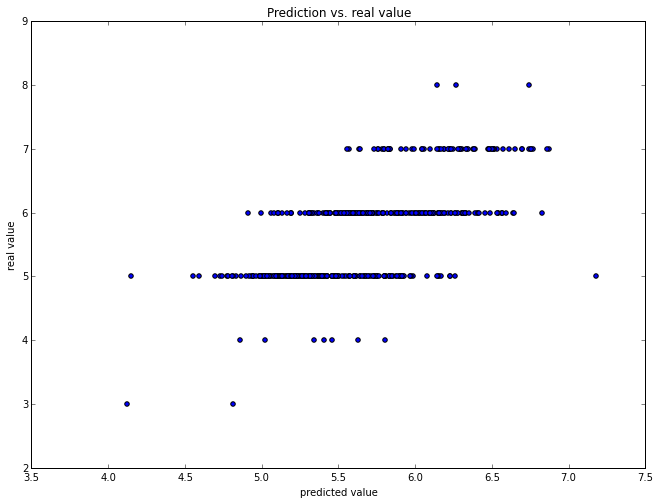

In [116]:
fig = plt.figure(figsize=(11,8))
predVals = np.array(list(map(lambda l: l[0], predictions)))
targetVals = np.array(list(map(lambda l: l[1], predictions)))

plt.scatter(predVals, targetVals)
plt.xlabel('predicted value')
plt.ylabel('real value')
plt.title('Prediction vs. real value')

In [124]:
def computeMeanSquaredError(predictions, targets):
    return ((predictions - targets) **2).mean()

mse = computeMeanSquaredError(predVals, targetVals)
print('The mean squared error is %.4f' %mse)

The mean squared error is 0.3567
